In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
fullyConnectednn = models.Sequential()
fullyConnectednn.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
fullyConnectednn.add(layers.Dense(10, activation='softmax'))

fullyConnectednn.compile(optimizer='rmsprop',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [3]:
fullyConnectednn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
convnn = models.Sequential()
convnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
convnn.add(layers.MaxPooling2D((2, 2)))
convnn.add(layers.Conv2D(64, (3, 3), activation='relu')) 
convnn.add(layers.MaxPooling2D((2, 2)))
convnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

convnn.add(layers.Flatten())
convnn.add(layers.Dense(64, activation='relu'))
convnn.add(layers.Dense(10, activation='softmax'))

In [5]:
convnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [8]:
fcn_train_images = train_images.reshape((60000, 28*28))
fcn_train_images = fcn_train_images.astype('float32')/255

fcn_test_images = test_images.reshape((10000, 28*28))
fcn_test_images = fcn_test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
fullyConnectednn.fit(fcn_train_images,
                     train_labels,
                     epochs=5,
                     batch_size=128)
fcn_test_loss, fcn_test_acc = fullyConnectednn.evaluate(fcn_test_images, test_labels)
print('Fully connected accuracy:', fcn_test_acc)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2576 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.1028 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0677 - acc: 0.9805
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0489 - acc: 0.9852
Epoch 5/5
10000/10000 [==============================] - 0s 36us/step
Fully connected accuracy: 0.9779


In [10]:
cnn_train_images = train_images.reshape((60000, 28, 28, 1))
cnn_train_images = cnn_train_images.astype('float32')/255

cnn_test_images = test_images.reshape((10000, 28, 28, 1))
cnn_test_images = cnn_test_images.astype('float32')/255

convnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
convnn.fit(cnn_train_images,
           train_labels,
           epochs=5,
           batch_size=64)
cnn_test_loss, cnn_test_acc = convnn.evaluate(cnn_test_images, test_labels)
print('Convolutional accuracy:', cnn_test_acc)

Epoch 1/5
60000/60000 [==============================] - 30s 493us/step - loss: 0.1737 - acc: 0.9453
Epoch 2/5
60000/60000 [==============================] - 30s 502us/step - loss: 0.0488 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 29s 486us/step - loss: 0.0332 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 29s 485us/step - loss: 0.0252 - acc: 0.9926
Epoch 5/5
10000/10000 [==============================] - 2s 180us/step
Convolutional accuracy: 0.9916


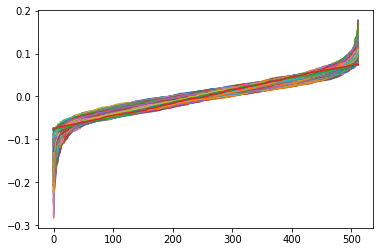

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

layer = fullyConnectednn.layers[0]
dense,bias = layer.get_weights()
sorted_dense = np.sort(dense, axis=1)
norms_dense = np.linalg.norm(dense, axis=1)
out = sorted_dense / norms_dense[:, np.newaxis]
plt.plot(out.T)
plt.show()

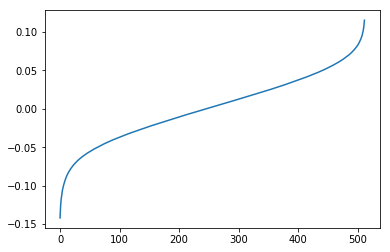

In [56]:
mn = out.mean(axis=0)
plt.plot(mn)
plt.show()

In [57]:
args = np.argsort(dense, axis=1) # sorted = np.take_along_axis(dense, args, axis=1)
b = np.argsort(args, axis=1)     # 
unsorted = np.take_along_axis(out, b, axis=1) * norms_dense[:, np.newaxis]
unsmat =  np.take_along_axis(mn[np.newaxis, :], b, axis=1)
# followed later by: layer.set_weights([unsmat, bias])

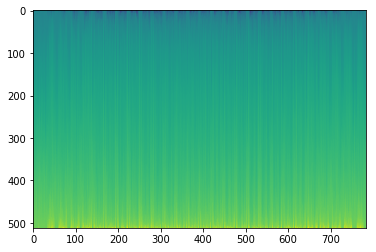

In [58]:
plt.imshow(out.T)

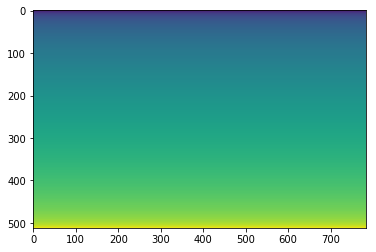

In [59]:
plt.imshow((mn[np.newaxis, :] / np.ones_like(out)).T)

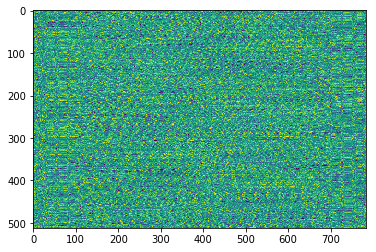

In [60]:
plt.imshow(unsmat.T)

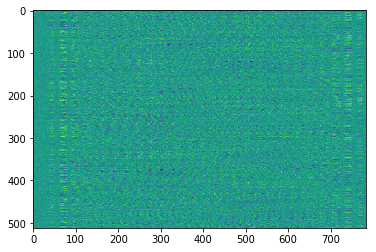

In [61]:
plt.imshow(dense.T)

In [62]:
layer.set_weights([unsmat, bias])

In [63]:
fullyConnectednn.layers

In [64]:
layer

In [67]:
# ORIGINAL: Fully connected accuracy: 0.9779
fcn_test_loss, fcn_test_acc = fullyConnectednn.evaluate(fcn_test_images, test_labels)
print('Fully connected accuracy:', fcn_test_acc)

10000/10000 [==============================] - 0s 39us/step
Fully connected accuracy: 0.9679
